<a href="https://colab.research.google.com/github/Sayani26/Topic-Defense/blob/main/4_spcs_evolve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook runs a time evolution calculation for a 4-species system with weak rates turned on. The weak rates are turned on at a delayed time when the system has already achieved NSE.  

1) Importing ode from scipy to solve coupled ordinary differential equations of the network

In [ ]:
from scipy.integrate import ode
from scipy import special

2) Defining the strong electromgnetic rates $\lambda_{ij}$

In [ ]:
l_12 = 1.0
l_21 = 1.0
l_13 = 1.0
l_31 = 1.0
l_34 = 1.0
l_43 = 1.0
l_24 = 1.0
l_42 = 1.0

3) Defining the ODEs 

In [ ]:
def f(t, x):
    factor = 0.5 * (1 + special.erf((t - 10)/1))
    L_13 = 5 * factor
    L_42 = 3 * factor
    factor1 = 0.5 * (1 + special.erf((t - 100)/1))
    L_31 = 5 * factor1
    L_24 = 3 * factor1
    return [
      -l_12 * x[0] -l_13 * x[0] - L_13 * x[0] + l_21 * x[1] + l_31 * x[2] + L_31 *x[2] ,
            l_12 * x[0] - l_21 * x[1] - l_24 * x[1] -L_24 * x[1] + l_42 * x[3] + L_42 * x[3], 
              l_13 * x[0] + L_13 * x[0] - l_31 * x[2] -L_31 * x[2] - l_34 * x[2] + l_43 * x[3],
               l_24 * x[1] + L_24 * x[1] + l_34 * x[2] - l_43 * x[3] - l_42 * x[3] - L_42 * x[3],
    ]


4)Defining the initial values for solving the ODEs

In [ ]:
t0 = 0
x0 = [0.5, 0.2, 0.1, 0.2]

5)Solving the ODEs and creating the arrays with the mass fractions

In [ ]:
r = ode(f).set_integrator('lsoda', method='bdf')
r.set_initial_value(x0, t0)
t1 = 1000
dt = 0.0001
time = [0]
xv = [x0]
while r.successful() and r.t < t1:
    time.append(r.t+dt), xv.append(r.integrate(r.t+dt))

x1 = []
x2 = []
x3 = []
x4 = []

for xx in xv:
    x1.append(xx[0])
    x2.append(xx[1])
    x3.append(xx[2])
    x4.append(xx[3])

6) Importing matplotlib to plot

In [ ]:
import matplotlib.pyplot as plt

7) Plotting the mass fractions

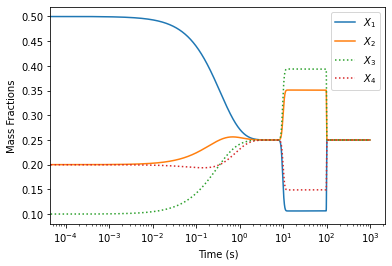

In [ ]:
plt.figure(1)
plt.plot(time, x1, label = '$X_1$')
plt.plot(time, x2, label = '$X_2$')
plt.plot(time, x3, ':', label = '$X_3$')
plt.plot(time, x4, ':', label = '$X_4$')
plt.xscale('log') 
plt.xlabel('Time (s)')
plt.ylabel('Mass Fractions')
plt.legend()
plt.show() 

8) Importing numpy

In [ ]:
import numpy as np

9) Defining the weak rates $\Lambda_{ij}$ 

In [ ]:
t_1 = np.linspace(0,1000,10000002)
factor = 0.5 * (1 + special.erf((t_1 - 10)/1))
L_13 = 5 * factor
L_42 = 3 * factor

factor1 = 0.5 * (1 + special.erf((t_1 - 100)/1))
L_31 = 5 * factor1
L_24 = 3 * factor1

10) Plotting the weak rates

In [ ]:
plt.figure(2)
plt.plot(t_1, L_13, label = '$L_{13}$')
plt.plot(t_1, L_42, label = '$L_{42}$')
plt.plot(t_1, L_31, label = '$L_{31}$')
plt.plot(t_1, L_24, label = '$L_{24}$')
plt.xscale('log') 
plt.xlabel('Time (s)')
plt.ylabel(r'$\Lambda$')
plt.legend()
plt.show()  

NameError: ignored

<Figure size 432x288 with 0 Axes>

11) Computing the flows

In [ ]:
f13 = [((l_13 + w1) * a - (l_31 + w2) * b) for a, b, w1, w2 in zip(x1,x3, L_13, L_31)]
f34 = [(l_34 * a - l_43 * b) for a, b in zip(x3,x4)]
f42 = [((l_42 + w1) * a - (l_24 + w2 )* b) for a, b, w1, w2 in zip (x4,x2, L_42, L_24)]
f21 = [(l_21 * a - l_12 * b) for a, b in zip (x2,x1)]

NameError: ignored

12) Plotting the flows

In [ ]:
plt.figure(3)
plt.plot(t_1, f13, label = '$F_{13}$')
plt.plot(t_1, f34, label = '$F_{34}$')
plt.plot(t_1, f42, label = '$F_{42}$')
plt.plot(t_1, f21, label = '$F_{21}$')
plt.xscale('log') 
plt.yscale('log')
plt.title(r'Time variation of the flows')
plt.xlabel('Time (s)')
plt.ylabel('flows')
plt.legend()
plt.show()

NameError: ignored

<Figure size 432x288 with 0 Axes>

13) Calculating the energy levels

14) Defining the length of the array

In [ ]:
l = 100002

15) Defining empty arrays for the energy and the $\Delta E_i$

In [ ]:
E1 = np.zeros(l)
E2 = np.zeros(l)
E3 = np.zeros(l)
E4 = np.zeros(l)
Etotal = np.zeros(l)
del_E1 = np.zeros(l)
del_E2 = np.zeros(l)
del_E3 = np.zeros(l)
del_E4 = np.zeros(l)

NameError: ignored

16) Defining the time array

In [ ]:
t = np.linspace(0,1000,l)

17) Finding array positions where t<10 and t<100

In [ ]:
b = np.where(t<10)
c = np.where(t<100)

18) Updating the energy arrays based on the condition when t<10, 10<t<100 and t>100 

In [ ]:
for i in range(l):
     if i<np.max(b):
        L_13 = 0
        L_42 = 0
        L_31 = 0
        L_24 = 0
        sum_all_brn1 = l_12*l_24*L31 + l_12*l_24*l_34 + l_12*l_24*L43 + l_12*l_24*L_31 + l_12*l_31*l_42 + l_12*l_31*l_43 + l_12*l_31*L_24 + l_12*l_31*L_42 + l_12*l_34*l_42 + l_12*l_34*L_24 + l_12*l_34*L_42 + l_12*l_42*L_31 + l_12*l_43*L_24 + l_12*l_43*L_31 + l_12*L_24*L_31 + l_12*L_31*L_42 + l_13*l_21*l_34 + l_13*l_21*l_42 + l_13*l_21*l_43 + l_13*l_21*L_42 + l_13*l_24*l_34 + l_13*l_24*l_43 + l_13*l_34*l_42 + l_13*l_34*L_24 + l_13*l_34*L_42 + l_13*l_43*L_24 + l_21*l_31*l_42 + l_21*l_31*l_43 + l_21*l_31*L_42 + l_21*l_34*l_42 + l_21*l_34*L_13 + l_21*l_34*L_42 + l_21*l_42*L_13 + l_21*l_42*L_31 + l_21*l_43*L_13 + l_21*l_43*L_31 + l_21*L_13*L_42 + l_21*L_31*L_42 + l_24*l_31*l_43 + l_24*l_34*L_13 + l_24*l_43*L_13 + l_24*l_43*L_31 + l_31*l_43*L_24 + l_34*l_42*L_13 + l_34*L_13*L_24 + l_34*L_13*L_42 + l_43*L_13*L_24 + l_43*L_24*L_31        
        sb_1 = (l_21*l_31*l_42 + l_21*l_31*l_43 + l_21*l_31*L_42 + l_21*l_34*l_42 + l_21*l_34*L_42 + l_21*l_42*L_31 + l_21*l_43*L_31 + l_21*L_31*L_42 + l_24*l_31*l_43 + l_24*l_43*L_31 + l_31*l_43*L_24 + l_43*L_24*L_31)
        sb_2 = (l_12*l_31*l_42 + l_12*l_31*l_43 + l_12*l_31*l_42 + l_12*l_34*l_42 + l_12*l_34*L_42 + l_12*l_42*L_31 + l_12*l_43*L_31 + l_12*L_31*L_42 + l_13*l_34*l_42 + l_13*l_34*L_42 + l_34*l_42*L_13 + l_34*L_13*L_42)
        sb_3 = (l_12*l_24*l_43 + l_12*l_43*L_24 + l_13*l_21*l_42 + l_13*l_21*l_43 + l_13*l_21*L_42 + l_13*l_24*l_43 + l_13*l_43*L_24 + l_21*l_42*L_13 + l_21*l_43*L_13 + l_21*L_13*L_42 + l_24*l_43*L_13 + l_43*L_13*L_24)
        sb_4 = (l_12*l_24*l_31 + l_12*l_24*l_34 + l_12*l_24*L_31 + l_12*l_31*L_24 + l_12*l_34*L_24 + l_12*L_24*L_31 + l_13*l_21*l_34 + l_13*l_24*l_34 + l_13*l_34*L_24 + l_21*l_34*L_13 + l_24*l_34*L_13 + l_34*L_13*L_24)
        sb_i = [sb_1, sb_2, sb_3, sb_4] 
        sb_min = np.max(sb_i)
        E1[i] = sum_all_brn1-sb_1
        E2[i] = sum_all_brn1-sb_2
        E3[i] = sum_all_brn1-sb_3
        E4[i] = sum_all_brn1-sb_4
        Etotal[i] = sum_all_brn1
        del_E1[i] = np.log(sb_min/sb_1)
        del_E2[i] = np.log(sb_min/sb_2)
        del_E3[i] = np.log(sb_min/sb_3)
        del_E4[i] = np.log(sb_min/sb_4)
     elif ((np.max(b)<=i) and (i<np.max(c))):
        factor = 0.5 * (1 + special.erf((t[i] - 10)/1))
        L_13 = 5 * factor
        L_42 = 3 * factor
        L_31 = 0
        L_24 = 0
        sum_all_brn = l_12*l_24*L31 + l_12*l_24*l_34 + l_12*l_24*L43 + l_12*l_24*L_31 + l_12*l_31*l_42 + l_12*l_31*l_43 + l_12*l_31*L_24 + l_12*l_31*L_42 + l_12*l_34*l_42 + l_12*l_34*L_24 + l_12*l_34*L_42 + l_12*l_42*L_31 + l_12*l_43*L_24 + l_12*l_43*L_31 + l_12*L_24*L_31 + l_12*L_31*L_42 + l_13*l_21*l_34 + l_13*l_21*l_42 + l_13*l_21*l_43 + l_13*l_21*L_42 + l_13*l_24*l_34 + l_13*l_24*l_43 + l_13*l_34*l_42 + l_13*l_34*L_24 + l_13*l_34*L_42 + l_13*l_43*L_24 + l_21*l_31*l_42 + l_21*l_31*l_43 + l_21*l_31*L_42 + l_21*l_34*l_42 + l_21*l_34*L_13 + l_21*l_34*L_42 + l_21*l_42*L_13 + l_21*l_42*L_31 + l_21*l_43*L_13 + l_21*l_43*L_31 + l_21*L_13*L_42 + l_21*L_31*L_42 + l_24*l_31*l_43 + l_24*l_34*L_13 + l_24*l_43*L_13 + l_24*l_43*L_31 + l_31*l_43*L_24 + l_34*l_42*L_13 + l_34*L_13*L_24 + l_34*L_13*L_42 + l_43*L_13*L_24 + l_43*L_24*L_31        
        sb_11 = (l_21*l_31*l_42 + l_21*l_31*l_43 + l_21*l_31*L_42 + l_21*l_34*l_42 + l_21*l_34*L_42 + l_21*l_42*L_31 + l_21*l_43*L_31 + l_21*L_31*L_42 + l_24*l_31*l_43 + l_24*l_43*L_31 + l_31*l_43*L_24 + l_43*L_24*L_31)
        sb_22 = (l_12*l_31*l_42 + l_12*l_31*l_43 + l_12*l_31*l_42 + l_12*l_34*l_42 + l_12*l_34*L_42 + l_12*l_42*L_31 + l_12*l_43*L_31 + l_12*L_31*L_42 + l_13*l_34*l_42 + l_13*l_34*L_42 + l_34*l_42*L_13 + l_34*L_13*L_42)
        sb_33 = (l_12*l_24*l_43 + l_12*l_43*L_24 + l_13*l_21*l_42 + l_13*l_21*l_43 + l_13*l_21*L_42 + l_13*l_24*l_43 + l_13*l_43*L_24 + l_21*l_42*L_13 + l_21*l_43*L_13 + l_21*L_13*L_42 + l_24*l_43*L_13 + l_43*L_13*L_24)
        sb_44 = (l_12*l_24*l_31 + l_12*l_24*l_34 + l_12*l_24*L_31 + l_12*l_31*L_24 + l_12*l_34*L_24 + l_12*L_24*L_31 + l_13*l_21*l_34 + l_13*l_24*l_34 + l_13*l_34*L_24 + l_21*l_34*L_13 + l_24*l_34*L_13 + l_34*L_13*L_24)
        sb = [sb_11, sb_22, sb_33, sb_44]
        sb_min1 = np.max(sb)#The branching that corresponds to the minimum energy has the maximum value and that is why I am calling it sb_min
        E1[i] = sum_all_brn-sb_11
        E2[i] = sum_all_brn-sb_22
        E3[i] = sum_all_brn-sb_33
        E4[i] = sum_all_brn-sb_33
        Etotal[i] = sum_all_brn
        del_E1[i] = np.log(sb_min1/sb_11)
        del_E2[i] = np.log(sb_min1/sb_22)
        del_E3[i] = np.log(sb_min1/sb_33)
        del_E4[i] = np.log(sb_min1/sb_44)
     else:
        factor = 0.5 * (1 + special.erf((t[i] - 10)/1))
        L_13 = 5 * factor
        L_42 = 3 * factor
        factor1 = 0.5 * (1 + special.erf((t[i] - 100)/1))
        L_31 = 5 * factor1
        L_24 = 3 * factor1
        sum_all_brn2 = l_12*l_24*L31 + l_12*l_24*l_34 + l_12*l_24*L43 + l_12*l_24*L_31 + l_12*l_31*l_42 + l_12*l_31*l_43 + l_12*l_31*L_24 + l_12*l_31*L_42 + l_12*l_34*l_42 + l_12*l_34*L_24 + l_12*l_34*L_42 + l_12*l_42*L_31 + l_12*l_43*L_24 + l_12*l_43*L_31 + l_12*L_24*L_31 + l_12*L_31*L_42 + l_13*l_21*l_34 + l_13*l_21*l_42 + l_13*l_21*l_43 + l_13*l_21*L_42 + l_13*l_24*l_34 + l_13*l_24*l_43 + l_13*l_34*l_42 + l_13*l_34*L_24 + l_13*l_34*L_42 + l_13*l_43*L_24 + l_21*l_31*l_42 + l_21*l_31*l_43 + l_21*l_31*L_42 + l_21*l_34*l_42 + l_21*l_34*L_13 + l_21*l_34*L_42 + l_21*l_42*L_13 + l_21*l_42*L_31 + l_21*l_43*L_13 + l_21*l_43*L_31 + l_21*L_13*L_42 + l_21*L_31*L_42 + l_24*l_31*l_43 + l_24*l_34*L_13 + l_24*l_43*L_13 + l_24*l_43*L_31 + l_31*l_43*L_24 + l_34*l_42*L_13 + l_34*L_13*L_24 + l_34*L_13*L_42 + l_43*L_13*L_24 + l_43*L_24*L_31        
        sb_111 = (l_21*l_31*l_42 + l_21*l_31*l_43 + l_21*l_31*L_42 + l_21*l_34*l_42 + l_21*l_34*L_42 + l_21*l_42*L_31 + l_21*l_43*L_31 + l_21*L_31*L_42 + l_24*l_31*l_43 + l_24*l_43*L_31 + l_31*l_43*L_24 + l_43*L_24*L_31)
        sb_222 = (l_12*l_31*l_42 + l_12*l_31*l_43 + l_12*l_31*l_42 + l_12*l_34*l_42 + l_12*l_34*L_42 + l_12*l_42*L_31 + l_12*l_43*L_31 + l_12*L_31*L_42 + l_13*l_34*l_42 + l_13*l_34*L_42 + l_34*l_42*L_13 + l_34*L_13*L_42)
        sb_333 = (l_12*l_24*l_43 + l_12*l_43*L_24 + l_13*l_21*l_42 + l_13*l_21*l_43 + l_13*l_21*L_42 + l_13*l_24*l_43 + l_13*l_43*L_24 + l_21*l_42*L_13 + l_21*l_43*L_13 + l_21*L_13*L_42 + l_24*l_43*L_13 + l_43*L_13*L_24)
        sb_444 = (l_12*l_24*l_31 + l_12*l_24*l_34 + l_12*l_24*L_31 + l_12*l_31*L_24 + l_12*l_34*L_24 + l_12*L_24*L_31 + l_13*l_21*l_34 + l_13*l_24*l_34 + l_13*l_34*L_24 + l_21*l_34*L_13 + l_24*l_34*L_13 + l_34*L_13*L_24)
        sb1 = [sb_111, sb_222, sb_333, sb_444]
        sb_min2 = np.max(sb1)
        E1[i] = sum_all_brn2-sb_111
        E2[i] = sum_all_brn2-sb_222
        E3[i] = sum_all_brn2-sb_333
        E4[i] = sum_all_brn2-sb_444
        Etotal[i] = sum_all_brn2
        del_E1[i] = np.log(sb_min2/sb_111)
        del_E2[i] = np.log(sb_min2/sb_222)
        del_E3[i] = np.log(sb_min2/sb_333)
        del_E4[i] = np.log(sb_min2/sb_444)

19) Plotting the energy levels

In [ ]:
t1 = np.linspace(0,1000,l)


plt.figure(1)
plt.plot(t1,E1, label = r'$E_1$')
plt.plot(t1,E2, label = r'$E_2$')
plt.plot(t1,E3, label = r'$E_3$')
plt.plot(t1,E4, label = r'$E_4$')
plt.plot(t1, Etotal, label = r'$E_{Overall}$')
plt.xscale('log')
plt.title('Energy vs time')
plt.ylabel('Energy')
plt.xlabel('time')
plt.legend()
plt.show()

20) Calculating $\Delta E_i$

In [ ]:
E1_min = np.min(E1)
E2_min = np.min(E2)
E3_min = np.min(E3)
E4_min = np.min(E4)

del_E = [E1-E1_min, E2 - E2_min, E3 - E3_min, E4 - E4_min]

21) Plotting $\Delta E_i$

In [ ]:
plt.figure(3)
plt.plot(t1, del_E1, label = '$E_1 - E_{min}$')
plt.plot(t1, del_E2, label = '$E_2 - E_{min}$')
plt.plot(t1, del_E3, label = '$E_3 - E_{min}$')
plt.plot(t1, del_E4, label = '$E_4 - E_{min}$')
plt.xscale('log') 
plt.xlabel('Time (s)')
plt.ylabel('$E_i - E_{min}$')
plt.legend()
plt.show()  